In [41]:
#First run:$pip install tf-explain, to import pre-trained models

#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [54]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False, classes=10)#Summary of Xception Model
print(model.summary)
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7ff6b9151dd0>>


<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7ff6b9151dd0>>

In [49]:
#from keras.applications.inception_v3 import InceptionV3
#from keras.layers import Input

# this could also be the output a different Keras model or layer
#input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

#model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

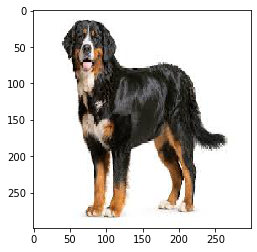

In [50]:
#loading and preprocessing cat image
IMAGE_PATH='../docs/Images/dog.jpeg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)#view the image
plt.imshow(img/255.)

In [52]:

import requests

#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

imgnet_map={v[1]:k for k, v in imgnet_map.items()}

#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
print(predictions)
decode_predictions(predictions,top=5)

[[[[-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   ...
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]]

  [[-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   ...
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]
   [-0.         -0.         -0.         ... -0.         -0.
    -0.        ]]

  [[-0.         -0.         -0.         ... -0.         -0

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 10, 10, 2048)

In [28]:
#Based on:https://medium.com/@gkadusumilli/image-recognition-using-pre-trained-xception-model-in-5-steps-96ac858f4206


#print(imgnet_map)

#import json

# read file
#with open('../conf/classes_index.json', 'r') as myfile:
#    data=myfile.read()

# parse file
#imgnet_map = json.loads(data)

# get the class label limit
class_limit = 10

#class names
class_names = ["Egyptian_cat", "dog", "human", "bluebell", "crocus"]